In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt

import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

In [72]:
#Read loan data and convert into data frame
loan= pd.read_csv(r'/content/drive/MyDrive/Lending-Club-Case-Study-master/loan.csv')

1. Data understanding and Cleaning

  Check if there are any header or footer or summary details are there. IF found, delete it.

In [73]:
#Print summary of loan data
loan.head()
print(loan.shape)
loan.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


THere are no header or summary rows, now check footer rows

In [74]:
loan.tail()
print(loan.tail())

          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN       

In [75]:
total_rows = len(loan)
print(total_rows)

39717


In [76]:
#Check various loan status and their count
loan["loan_status"].value_counts()
print(loan["loan_status"].value_counts())

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [77]:
#Drop those loan which are in Current Status
loan = loan[loan["loan_status"] != "Current"]
len(loan)
print('Number of rows excluding Loan STatus as Current', len(loan))

Number of rows excluding Loan STatus as Current 38577


In [78]:
#Let us calculate percentage of rows that are deleted
deleted_rows = (total_rows - len(loan))*100/total_rows
print('Percentage of rows deleted', round(deleted_rows,2))

Percentage of rows deleted 2.87


In [79]:
#Now check if there any duplicates present
duplicate_rows = len (loan[loan.duplicated()])
print('Duplicate rows ', duplicate_rows)


Duplicate rows  0


2. Duplicate unnecessary columns

In [80]:
#Again get shape of data
loan.shape

(38577, 111)

In [81]:
#Check percentage of nulls or blanks in columns
loan.isnull().sum()*100/len(loan)
print(loan.isnull().sum()*100/len(loan))

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


In [82]:
#Here tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit are 100% null, so safe to drop them from analysis
print('Total rows with nulls or blanks',len(loan.columns[loan.isna().all()].tolist() ))
print('Total rows with nulls ',len(loan.columns[loan.isnull().all()].tolist() ))

na_list = list(loan.columns[loan.isna().any()].tolist())
print('na_list',na_list)

Total rows with nulls or blanks 55
Total rows with nulls  55
na_list ['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'n

In [83]:
#Now delete all the columns for which all rows are having value null
loan = loan.dropna(axis=1, how='all')
print('loan.shape',loan.shape)

loan.shape (38577, 56)


In [84]:
#Finds columns with unique values
def find_unique_value_columns(loan):
  unique_value_cols = []
  for col in loan.columns:
    if loan[col].nunique() == len(loan):
      unique_value_cols.append(col)
  return unique_value_cols

unique_cols = find_unique_value_columns(loan)
print('unique_cols',unique_cols)

unique_cols ['id', 'member_id', 'url']


In [85]:
#Or we can find it out with more suitable way
unique_value_cols = [col for col in loan.columns if loan[col].nunique() == len(loan)]
unique_value_cols
print('unique_value_cols',unique_value_cols)

unique_value_cols ['id', 'member_id', 'url']


In [86]:
#Let us delete  ['id', 'member_id', 'url'] since their values are unique in nature
loan.drop(['url','member_id'],axis=1, inplace=True)

In [87]:
loan.shape

(38577, 54)

In [88]:
print('loan.shape',loan.shape)

loan.shape (38577, 54)


In [89]:
# We can see there are columns text,description whose values are not relevant to do analysis, so let us delete it

loan = loan.drop(['desc','title'],axis=1)
print('Loan.Head',loan.head())
print('Loan.Info',loan.info())
print('Loan.shape',loan.shape)

Loan.Head         id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
5  1075269       5000         5000           5000.0   36 months    7.90%   

   installment grade sub_grade             emp_title  ... last_pymnt_amnt  \
0       162.87     B        B2                   NaN  ...          171.62   
1        59.83     C        C4                 Ryder  ...          119.66   
2        84.33     C        C5                   NaN  ...          649.91   
3       339.31     C        C1   AIR RESOURCES BOARD  ...          357.48   
5       156.46     A        A4  Veolia Transportaton  ...          161.03   

  last_credit_pull_d  collections_12_mths_ex_med policy_code applicati

In [90]:
#Delete sub level
loan.drop(['sub_grade'],axis=1, inplace=True)
print('loan.shape',loan.shape)

loan.shape (38577, 51)


In [91]:
#some of fields are  post approval process, so they wont be useful in analysis
unuseful_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan=loan.drop(unuseful_cols,axis=1)

In [92]:
print('loan.shape',loan.shape)

loan.shape (38577, 30)


In [93]:
loan.nunique().sort_values()

,0
tax_liens,1
delinq_amnt,1
chargeoff_within_12_mths,1
acc_now_delinq,1
policy_code,1
collections_12_mths_ex_med,1
initial_list_status,1
pymnt_plan,1
loan_status,2
term,2


In [94]:
#columns values with 1. let us delete it
for column in loan.columns:
    if loan[column].nunique(dropna=True) == 1:
        print(column)
        loan = loan.drop(column, axis=1)
print('loan.shape',loan.shape)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
loan.shape (38577, 22)


In [95]:
#drop the columns for which more than 50% values are null
total_rows = len(loan)
for column in loan.columns:
    if loan[column].isna().mean().round(2) >= 0.50:
        print(column)
        loan = loan.drop(column, axis=1)
loan.shape

mths_since_last_delinq
mths_since_last_record


(38577, 20)

In [96]:
#Deleting emp_title as it is not relevent with EDA i.e. as per data dictionary is The job title supplied by the Borrower when applying for the loan.
loan =loan.drop(['emp_title'], axis=1)
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


# **Data Conversion**

In [97]:
print('loan.dtypes',loan.dtypes)

loan.dtypes id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object


In [98]:
#Let us check what are the values for term field
print('loan.term.value_counts',loan['term'].value_counts())

loan.term.value_counts term
 36 months    29096
 60 months     9481
Name: count, dtype: int64


In [99]:
#We can change  the type of terms to int
def convert_term_to_int(term):
    return int(term.strip().split()[0])

loan['term'] = loan['term'].apply(convert_term_to_int)



In [100]:
loan['term'].dtype

dtype('int64')

In [101]:
#find out int_rate values count
loan['int_rate'].value_counts()

,count
int_rate,
10.99%,913
11.49%,790
7.51%,787
13.49%,749
7.88%,725
...,...
16.96%,1
18.36%,1
16.15%,1


In [102]:
#Here int_rate is having % in it, let us convert it to float
loan['int_rate']=loan['int_rate'].str.strip('%').astype(float)

In [103]:
loan['int_rate'].value_counts()

,count
int_rate,
10.99,913
11.49,790
7.51,787
13.49,749
7.88,725
...,...
16.96,1
18.36,1
16.15,1


In [104]:
# Convert the column loan_funded_amnt and funded_amnt as flot64
loanf = loan.astype({'loan_amnt':'float','funded_amnt':'float'})
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500,8500,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000,5000,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000,5000,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [105]:
# check grade dattype.
loan['grade'].value_counts()

,count
grade,
B,11675
A,10045
C,7834
D,5085
E,2663
F,976
G,299


In [106]:
loan['emp_length'].value_counts()

,count
emp_length,
10+ years,8488
< 1 year,4508
2 years,4291
3 years,4012
4 years,3342
5 years,3194
1 year,3169
6 years,2168
7 years,1711


In [107]:
#Let us Rounding offloan_amnt, funded_amnt, funded_amnt_inv, int_rate and dti to two decimals points.
for clmn in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan[clmn] = loan[clmn].apply(lambda x: round(x,2))
    print(loan[clmn])

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 38577, dtype: int64
0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: funded_amnt, Length: 38577, dtype: int64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714  

In [108]:
#converting issue_d to date type
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['issue_d']

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
5,2011-12-01
...,...
39712,2007-07-01
39713,2007-07-01
39714,2007-07-01
39715,2007-07-01


In [109]:
#check if any column is null field or not
(loan.isnull().sum()*100)/len(loan)

,0
id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
emp_length,2.677761
home_ownership,0.000000


# Dropping the rows.

In [110]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
prev_rows=len(loan)
prev_rows

38577

In [111]:
loan= loan[loan['emp_length'].notna()]
loan= loan[loan['pub_rec_bankruptcies'].notna()]

In [112]:
after_rows=len(loan)
total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(loan.shape)

Total % of rows deleted: 4.48
(36847, 19)


In [113]:
# Check if there is any more na
(loan.isnull().sum()*100)/len(loan)

,0
id,0.0
loan_amnt,0.0
funded_amnt,0.0
funded_amnt_inv,0.0
term,0.0
int_rate,0.0
installment,0.0
grade,0.0
emp_length,0.0
home_ownership,0.0


In [114]:
# so we dont see any more na now

In [115]:
#let us correct emp length part
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan['emp_length']=loan['emp_length'].apply(lambda x : strip_emp_length(x) )

In [116]:
print(loan['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


# **Derived columns**

In [117]:
# Creating a dervied columns for issue month and issue year from issues date
loan['issue_year']=pd.DatetimeIndex(loan['issue_d']).year
loan['issue_month']=pd.DatetimeIndex(loan['issue_d']).month

(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

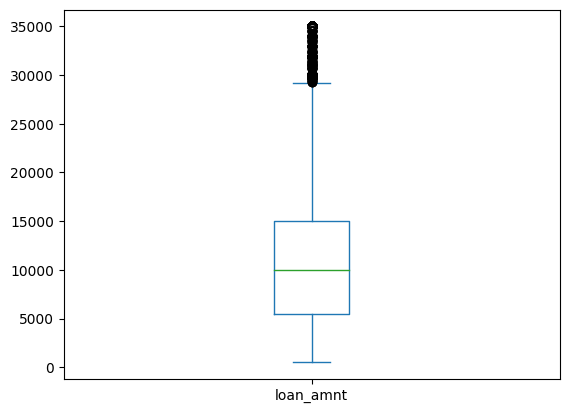

In [118]:
print(loan.shape)
print(loan["loan_amnt"].describe())
loan['loan_amnt'].plot(kind='box')

# **Univariate Analysis**

In [119]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [120]:
#Bucketing different varaibles for better analysis

In [121]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['loan_amnt_b'] = loan.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [122]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan['annual_inc_b'] = loan.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [123]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan['int_rate_b'] = loan.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [124]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan['dti_b'] = loan.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [125]:
# Univarients function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

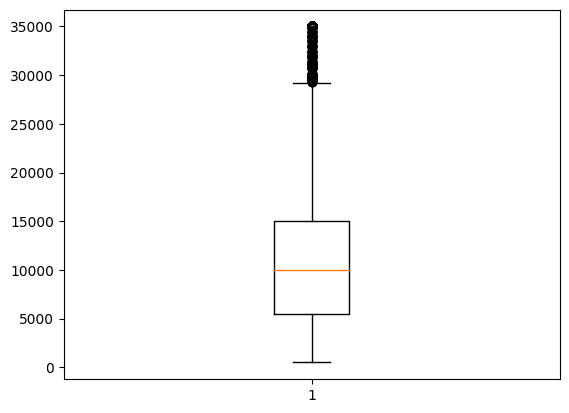

In [126]:
plot.boxplot(loan['loan_amnt'],)
plot.show()

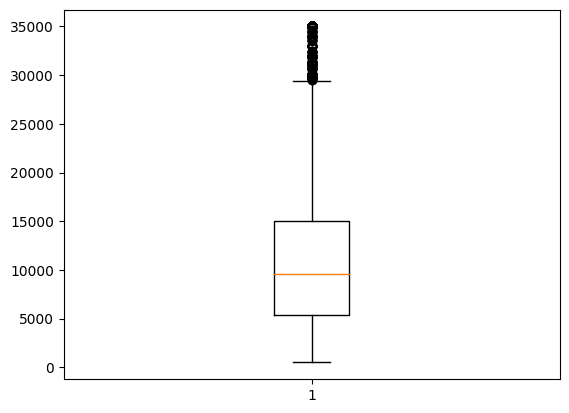

In [127]:
plot.boxplot(loan['funded_amnt'])
plot.show()

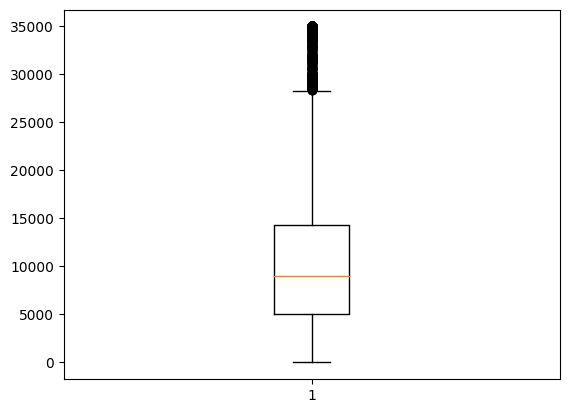

In [128]:
plot.boxplot(loan['funded_amnt_inv'])
plot.show()

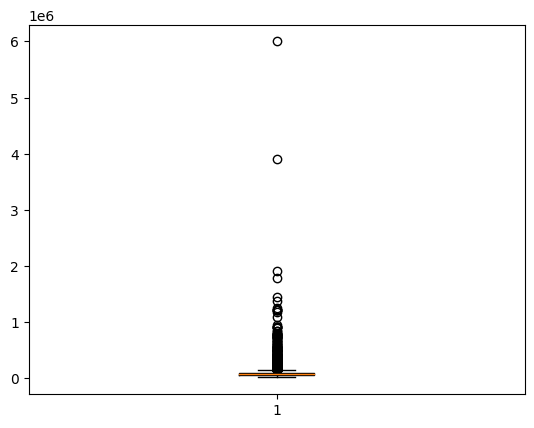

In [129]:
plot.boxplot(loan['annual_inc'])
plot.show()

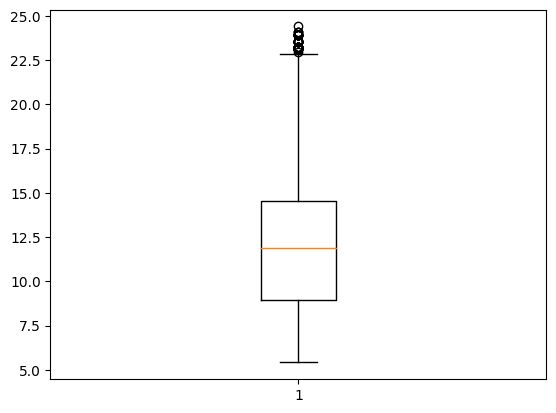

In [130]:
plot.boxplot(loan['int_rate'])
plot.show()

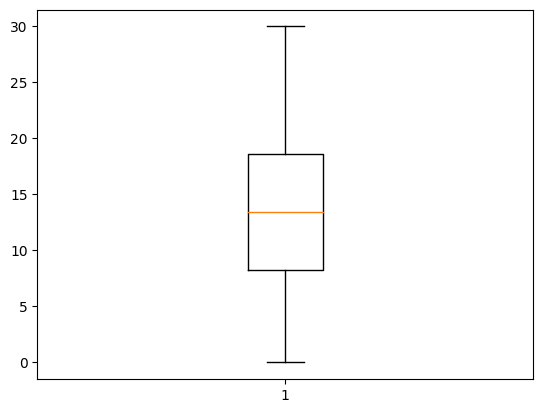

In [131]:
plot.boxplot(loan['dti'])
plot.show()

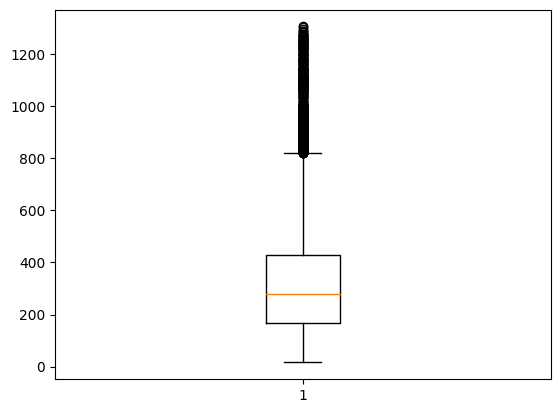

In [132]:
plot.boxplot(loan['installment'])
plot.show()

In [133]:
# From above box plts we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Lets remove the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan =remove_outliers_iqr(loan, outliers_columns_set1,1.5)
loan =remove_outliers_iqr(loan, outliers_columns_set2,1.5)

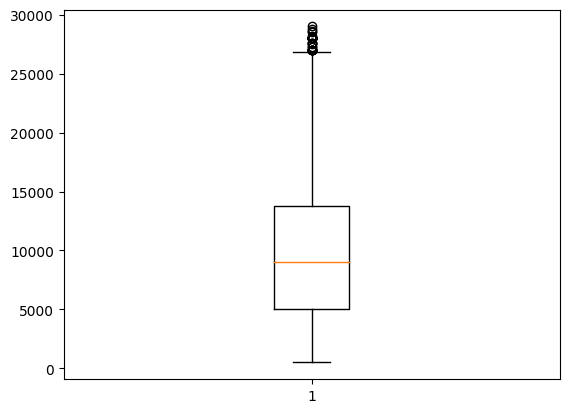

In [134]:
plot.boxplot(loan['loan_amnt'])
plot.show()

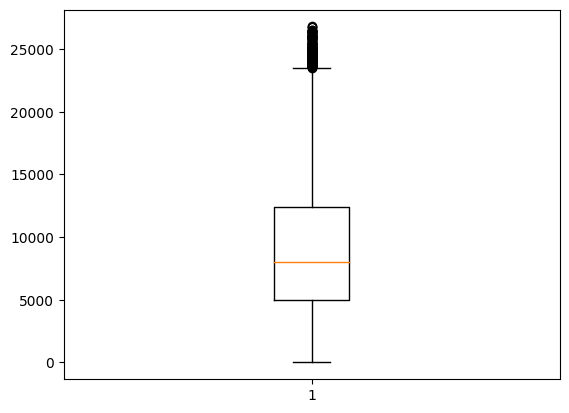

In [135]:
plot.boxplot(loan['funded_amnt_inv'])
plot.show()

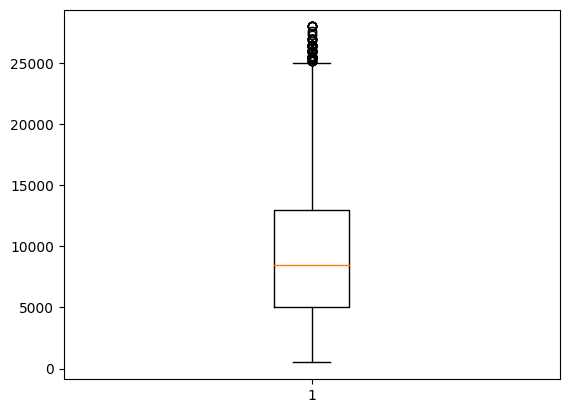

In [136]:
plot.boxplot(loan['funded_amnt'])
plot.show()

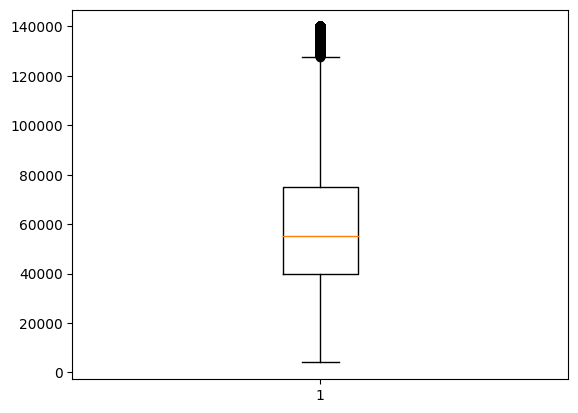

In [137]:
plot.boxplot(loan['annual_inc'])
plot.show()

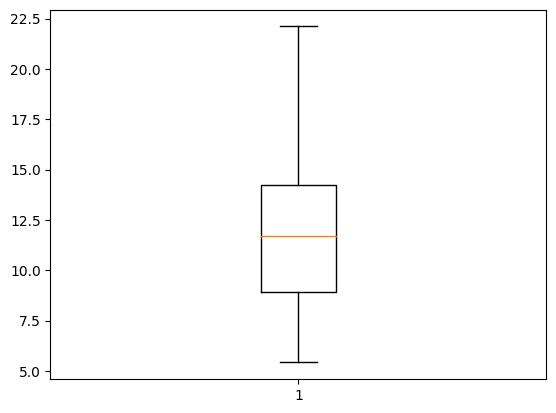

In [138]:
plot.boxplot(loan['int_rate'])
plot.show()

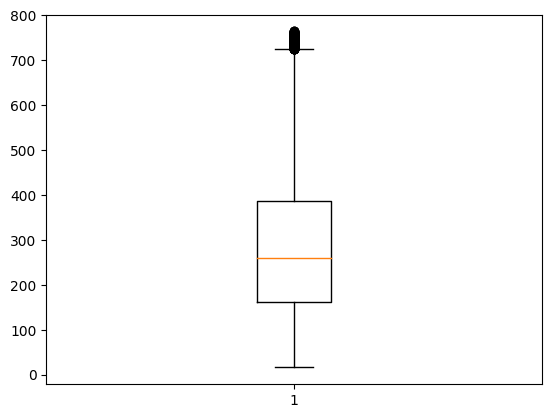

In [139]:
plot.boxplot(loan['installment'])
plot.show()

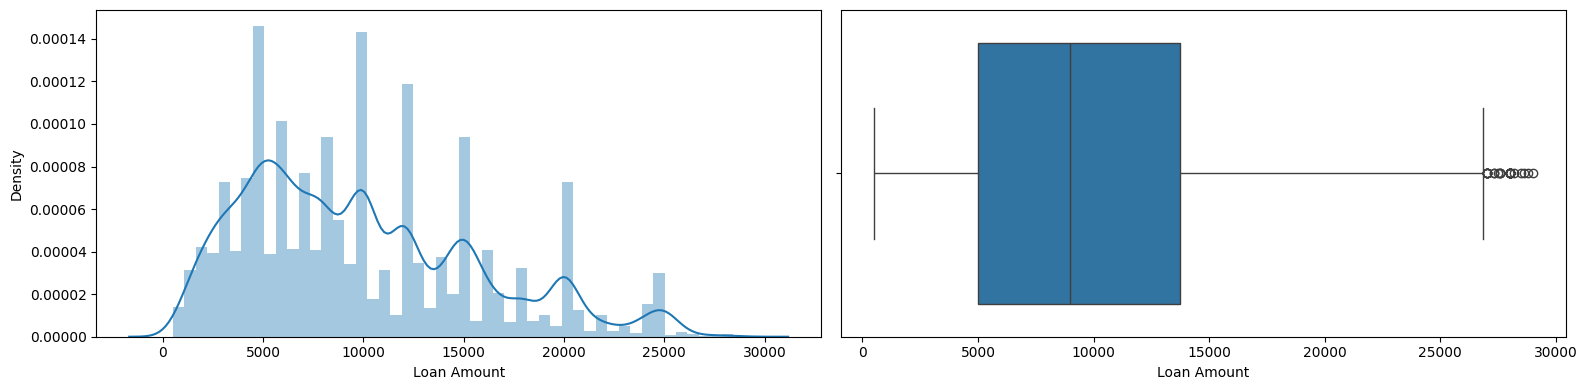

,loan_amnt
count,33191.000000
mean,9820.838480
std,5809.600807
min,500.000000
25%,5000.000000
50%,9000.000000
75%,13750.000000
max,29000.000000


In [140]:
plot_digram(loan, 'loan_amnt')
#print(loan_df["loan_amnt"].mean())
# describe the Loan Amount
loan['loan_amnt'].describe()

In [ ]:
# prompt: Provide observations from this graph

# The distribution of loan amounts is right-skewed, with a majority of loans falling between $5,000 and $15,000.
# The mean loan amount is around $11,000.
# There are a few outliers on the higher end, indicating some loans significantly larger than the average.


In [141]:
# observation:
# Most of the loan amount applied was in the range of 5k-14k.
# Max Loan amount applied was ~27k.


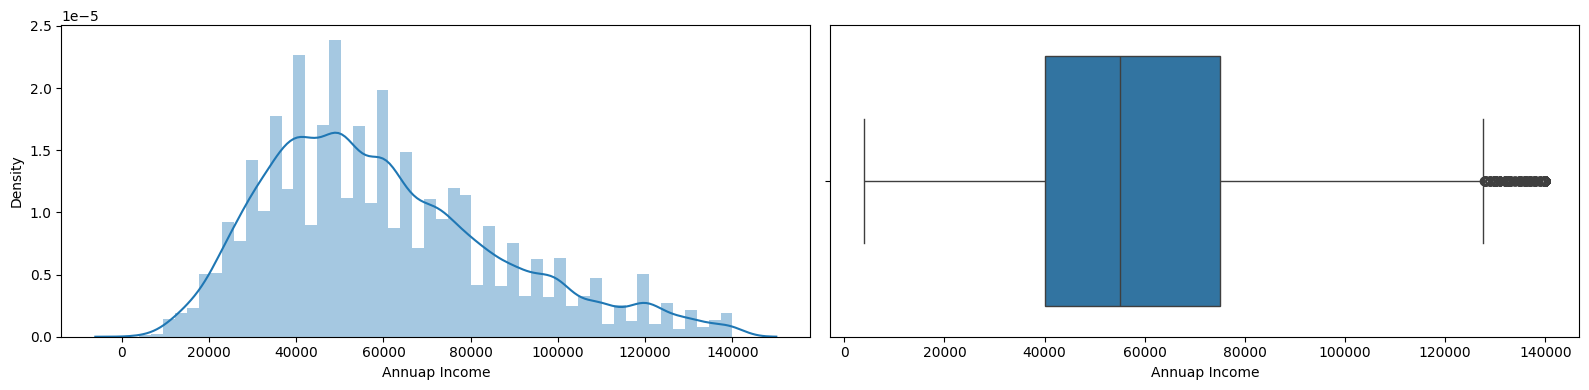

,annual_inc
count,33191.000000
mean,59883.284700
std,26916.857415
min,4000.000000
25%,40000.000000
50%,55000.000000
75%,75000.000000
max,140000.000000


In [142]:
plot_digram(loan, 'annual_inc')
#print(loan_df["loan_amnt"].mean())
# describe the annual income details
loan['annual_inc'].describe()

In [ ]:
# prompt: Proivide observatio from this graph

# Observations from the 'annual_inc' plot:

# The distribution of annual incomes is heavily right-skewed, indicating a concentration of borrowers with lower incomes and a long tail of high earners.
# The mean annual income is around $65,000, but the median is likely lower due to the skew.
# There are potential outliers on the higher end, suggesting a small number of borrowers with significantly higher incomes compared to the majority.


In [143]:
# The Annual income of most if applicants lies between 40k-75k.
print("Average Annual Income is :", round(loan['annual_inc'].mean(),0))

Average Annual Income is : 59883.0


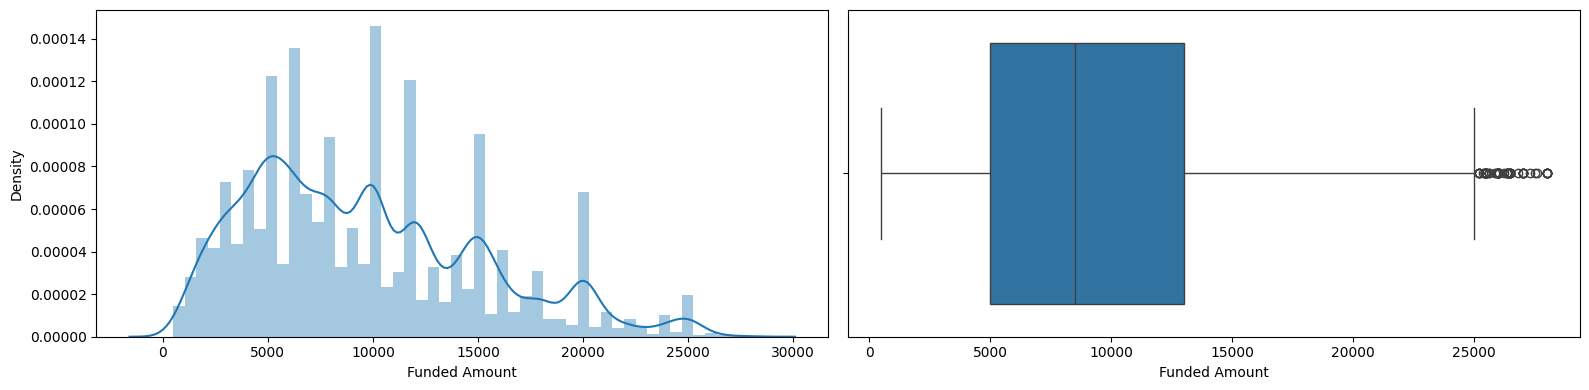

,funded_amnt
count,33191.000000
mean,9593.825887
std,5565.574327
min,500.000000
25%,5000.000000
50%,8500.000000
75%,13000.000000
max,28000.000000


In [144]:
plot_digram(loan, 'funded_amnt')
loan['funded_amnt'].describe()

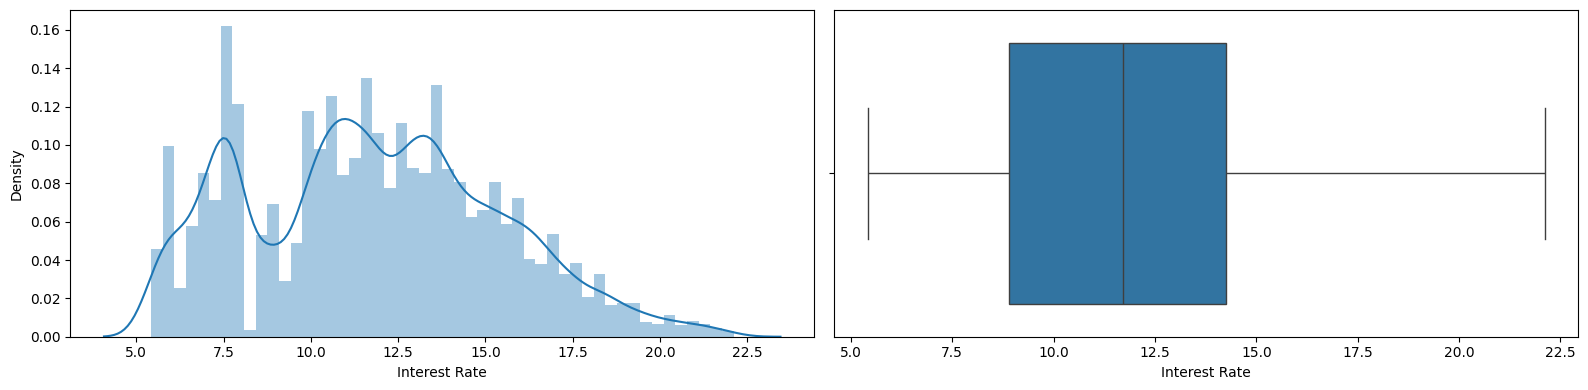

,int_rate
count,33191.000000
mean,11.782783
std,3.591944
min,5.420000
25%,8.900000
50%,11.710000
75%,14.260000
max,22.110000


In [145]:
plot_digram(loan, 'int_rate')
loan['int_rate'].describe()

In [ ]:
# prompt: Provide observations from this graph

# Observations from the 'int_rate' plot:

# The distribution of interest rates appears to be bimodal, with peaks around 10% and 13%.
# The mean interest rate is approximately 12%.
# There are no significant outliers in the interest rate distribution.

# The interest rate for most of the loans lies between 9%-14%.


In [146]:
# Most of the applicant's rate of interesrt is between in the range of 8%-14%.
# Average Rate of interest of rate is 11.7 %

# **Unordered Categorical Variable Analysis**

<Axes: xlabel='home_ownership'>

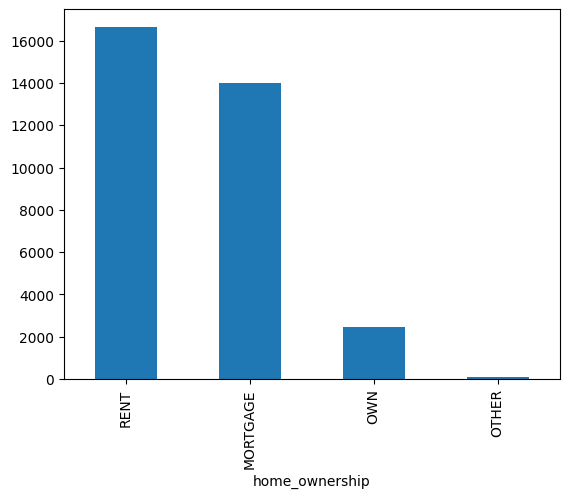

In [147]:
loan['home_ownership'].value_counts().plot.bar()

In [ ]:
# prompt: Provide observation for this graph

loan['home_ownership'].value_counts().plot.bar()
# Observation: Most of the loan applicants either living in rented house or mortgaged their house.


In [148]:
# Majority of loan applicants are either living on Rent or on Mortgage

<Axes: xlabel='purpose'>

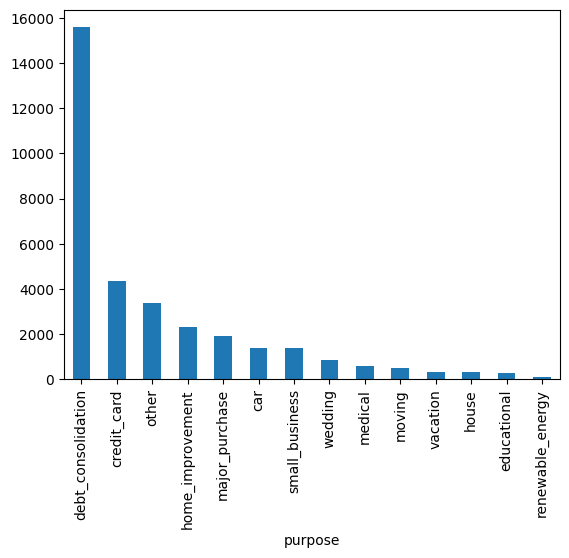

In [149]:
loan['purpose'].value_counts().plot.bar()

In [150]:
# Most of the loan applicants are for debt_consolidations.

In [151]:
Failed_per_houseowner_ship=loan
Failed_per_houseowner_ship["loan_status"].value_counts()

,count
loan_status,
Fully Paid,28477
Charged Off,4714


<Axes: ylabel='count'>

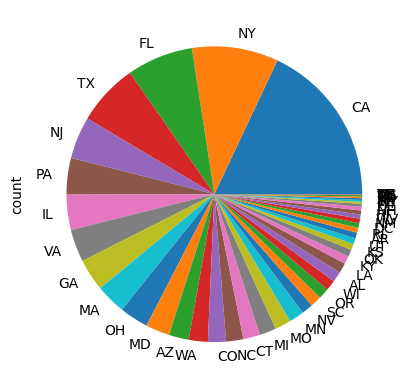

In [152]:
#using Pie plot to visualize
loan['addr_state'].value_counts().plot(kind="pie")

In [ ]:
# prompt: Provide your observation for this graph

# Observation: Most of the loan applicants are from CA state.


In [153]:
# Most of the Loan applicants are from CA(State).

# **Ordered Categorical Variable Analysis**

<Axes: ylabel='count'>

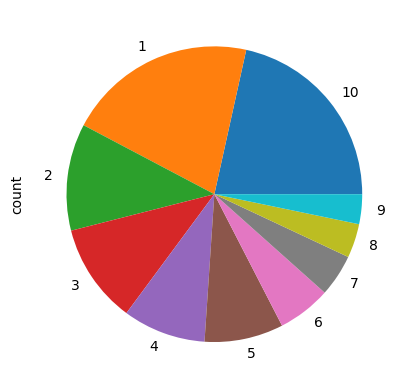

In [154]:
loan['emp_length'].value_counts().plot(kind="pie")

In [155]:
# Most of the applications are having 10+ yrs of Exp.

# **Bivariate Analysis**

In [156]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


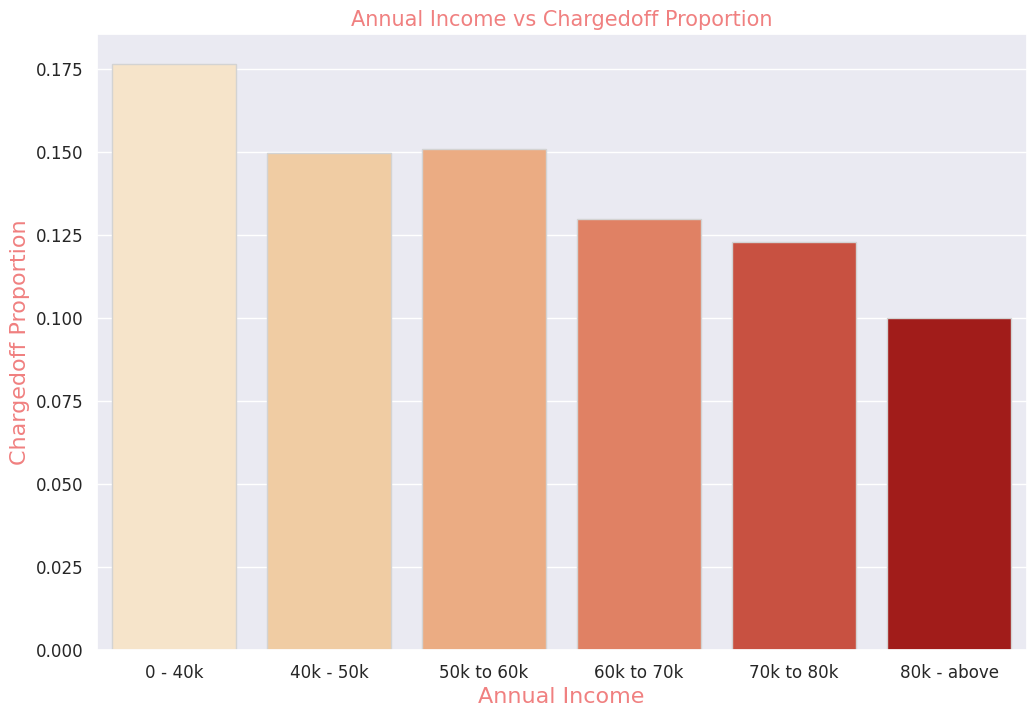

In [204]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plot.subplots(figsize=(12, 8) )
ax1.set_title('Annual Income vs Chargedoff Proportion', fontsize=15, color='#F08080')
ax1 = sea.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan,
                  palette='OrRd', edgecolor='#D3D3D3')
ax1.set_ylabel('Chargedoff Proportion', fontsize=16, color='#F08080')
ax1.set_xlabel('Annual Income', fontsize=16, color='#F08080')
plot.show()





In [ ]:
# prompt: Provide your observation for this graph

# Observation: Applicants with lower annual income are more likely to default on loans compared to those with higher annual incomes.
# This suggests that income level is a significant factor in assessing credit risk.


In [158]:
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-40000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [159]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = loan.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


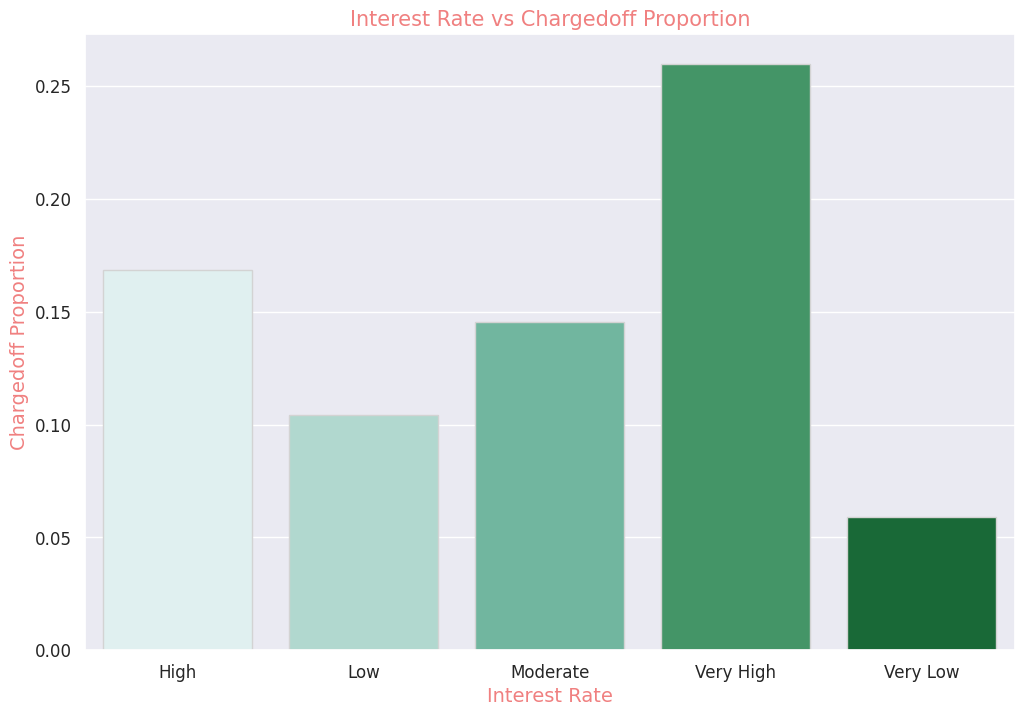

In [202]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion', fontsize=15, color='#F08080')
ax1 = sea.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan,
                  palette='BuGn', edgecolor='#D3D3D3')
ax1.set_xlabel('Interest Rate', fontsize=14, color='#F08080')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='#F08080')
plot.show()




In [ ]:
# prompt: Provide observation for this graph

### Observation: Loans with higher interest rates have a significantly higher proportion of charge-offs.
### This indicates that interest rate is a strong predictor of default risk, with higher rates associated with increased likelihood of loan default.


In [161]:
# Observations:
# interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimum 5 %.
# interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

**Another inference form the houseowner variable those who are not owning the house are most likely to be charged off.**

In [162]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


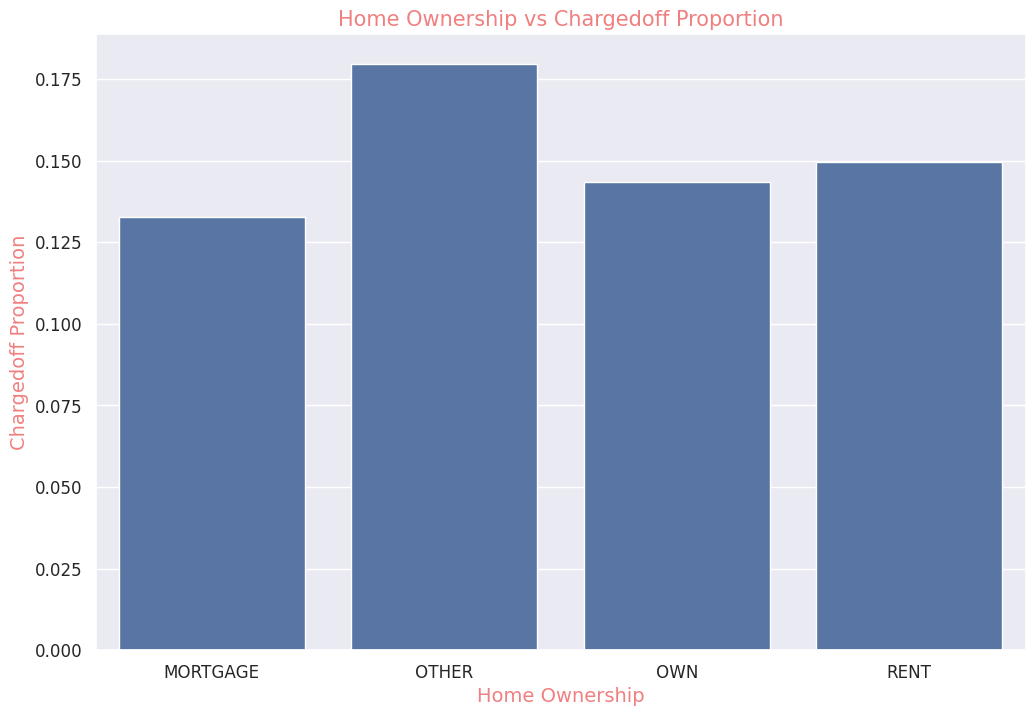

In [201]:
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.show()

In [164]:
# observation:
# Those who are not owning the home is having high chances of loan defaults.

In [165]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


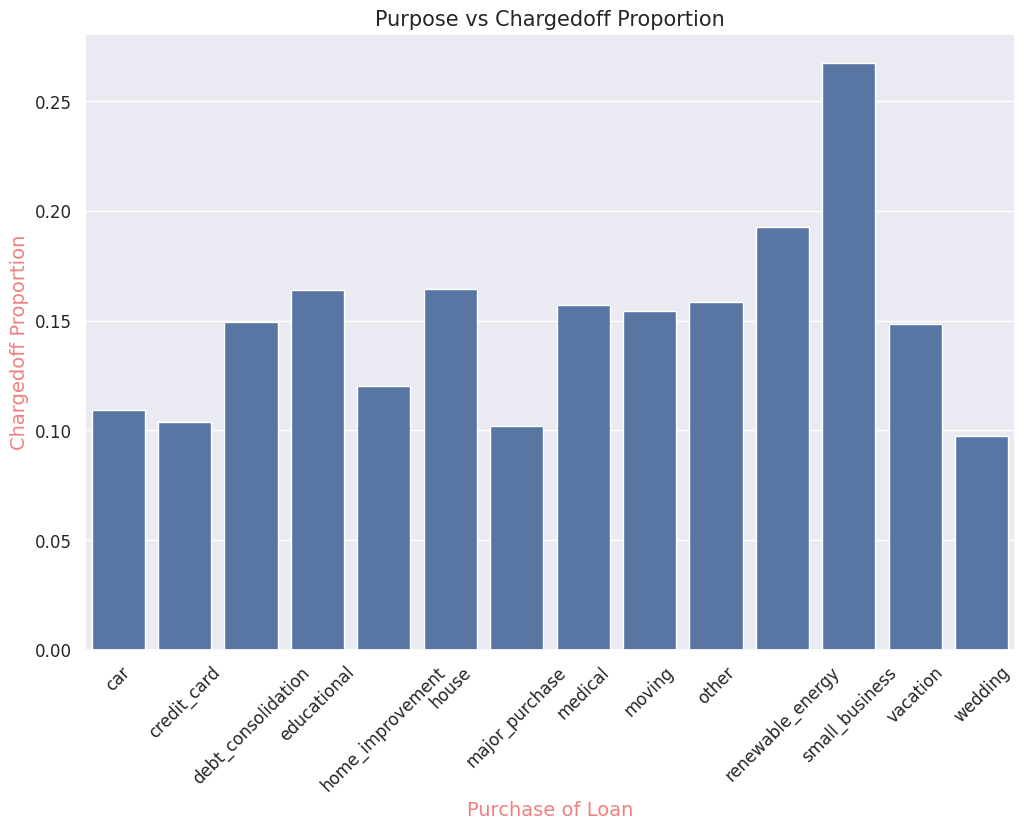

In [198]:
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15)
ax1=sea.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [167]:
#1. Those applicants who is having home loan is having low chances of loan defaults.
#2. Those applicants having loan for small bussiness is having high chances for loan defaults.

In [168]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = loan.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


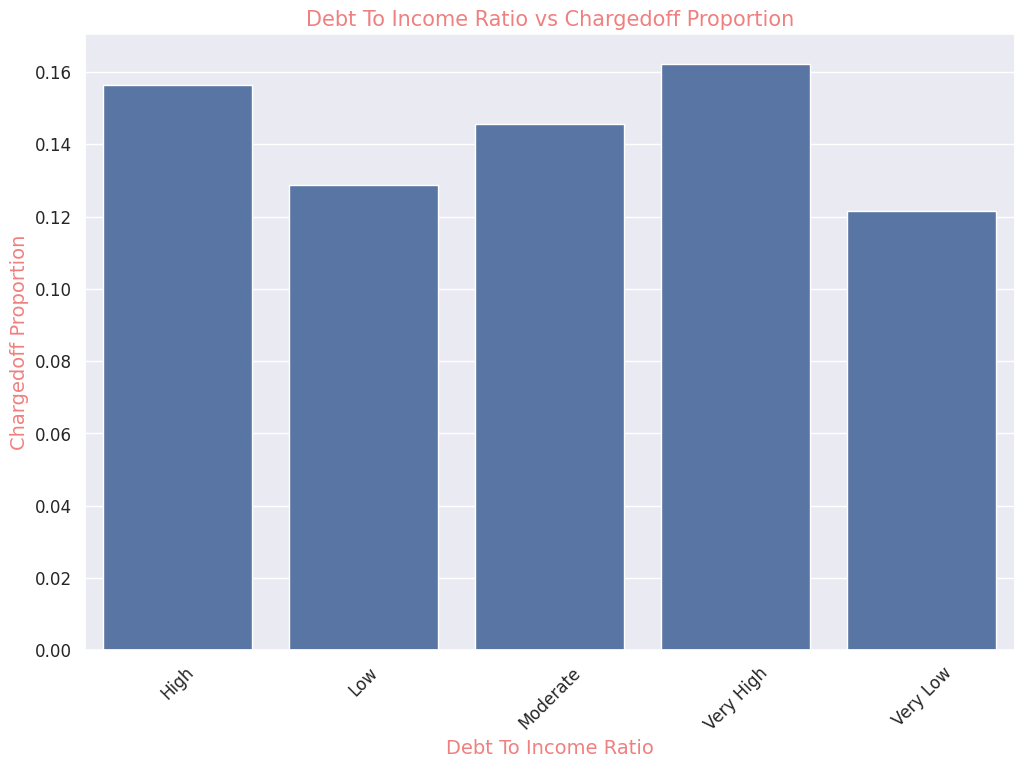

In [200]:
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [ ]:
# prompt: Provide observation for this graph

### Observation: As the Debt-to-Income ratio increases, the proportion of charged-off loans also tends to increase.
### This suggests that borrowers with higher DTI ratios are more likely to default, indicating a higher risk associated with lending to individuals with a larger debt burden relative to their income.


In [170]:
# Observation:
#1.High DTI value  having high risk of defaults
# 2 Lower the DTO having low chances loan defaults.

In [171]:
loan['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,31741
1.0,1445
2.0,5


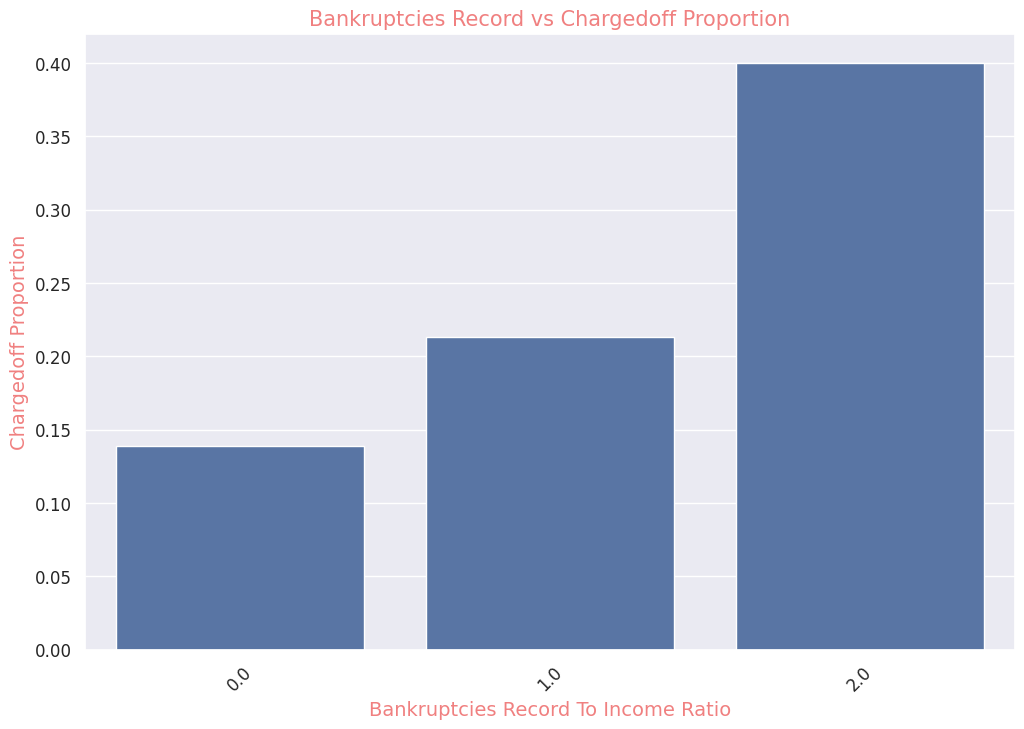

In [205]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [ ]:
# prompt: Provide observation for this graph

### Observation: Borrowers with a history of bankruptcies (pub_rec_bankruptcies > 0) exhibit a higher likelihood of loan default compared to those without any prior bankruptcies.
### This highlights the importance of considering past financial behavior as a key indicator of credit risk.


In [173]:
# Observations:
#1.Bankruptcies Record with 2 is having high impact on loan defaults
# 2.Bankruptcies Record with 0 is low impact on loan defaults
# 3.Lower the Bankruptcies lower the risk.

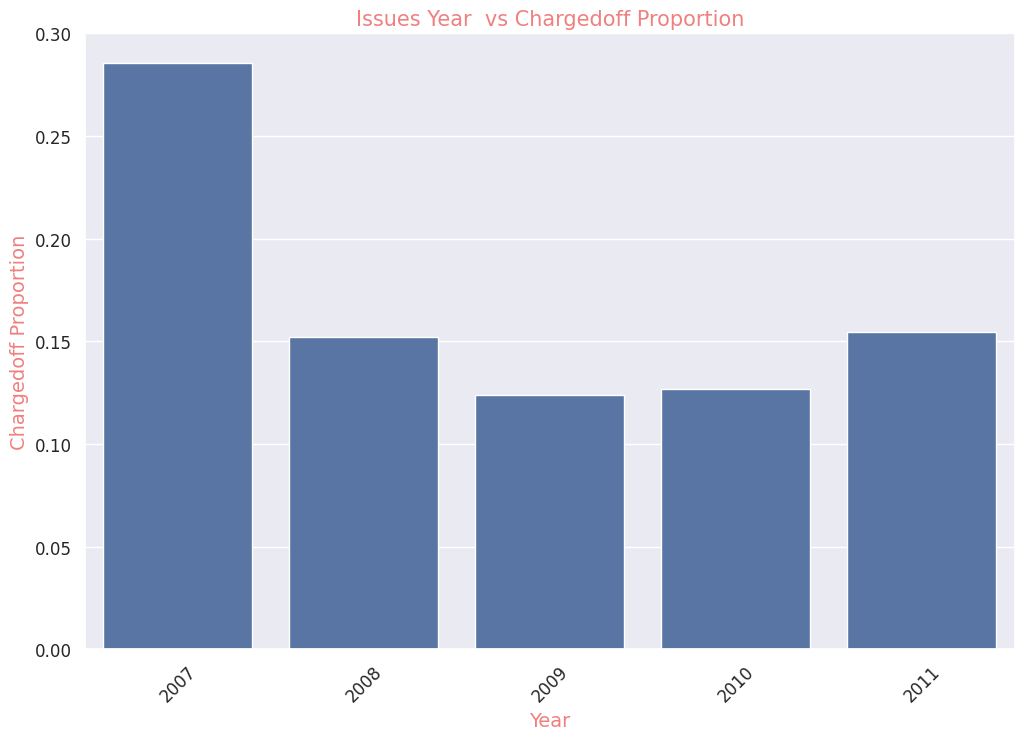

In [206]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_vs_loan = loan.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [ ]:
# prompt: Provide observation for this graph

### Observation: Loans issued in earlier years (2007 and 2008) show a higher proportion of charge-offs compared to those issued in later years.
### This could be attributed to various factors, including the economic conditions prevalent during those years or changes in lending practices over time.


In [175]:
   # Year 2007 is highest loan defaults.
    # 2009 is having lowest loan defaults.

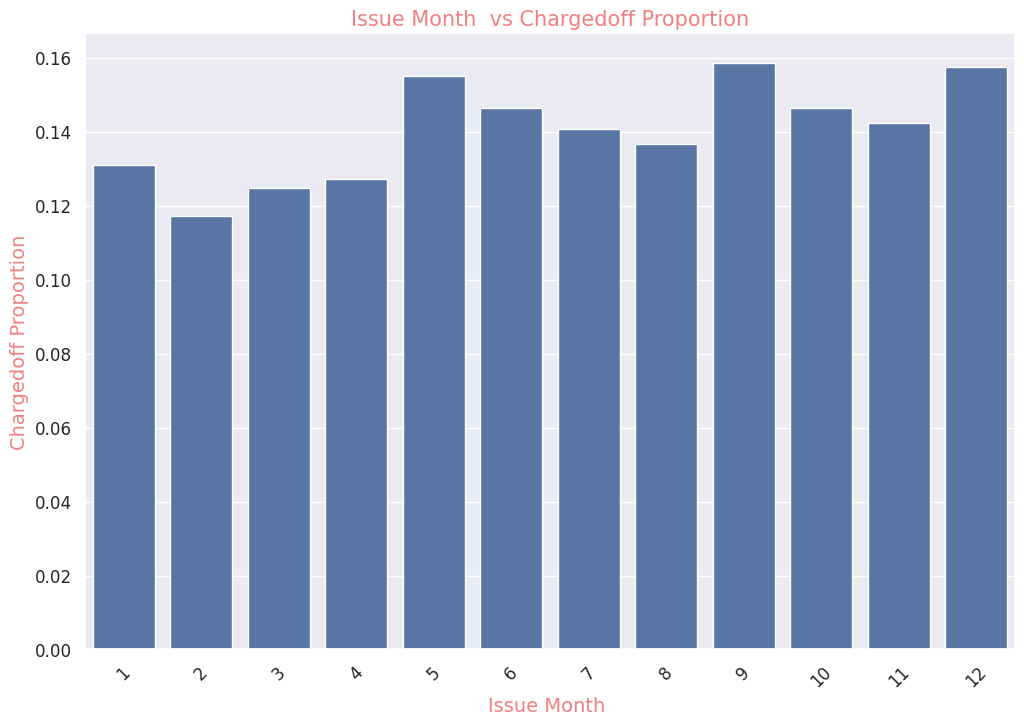

In [207]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [ ]:
# prompt: Provide observation for this graph

### Observation: There is no clear trend or significant variation in charge-off proportions across different months of loan issuance.
### This suggests that the month in which a loan is issued might not be a strong predictor of default risk.


In [177]:
# 1. Those loan has been issued in May, September and december is having high number of loan defaults
# 2. Those loan has been issued in month of February is having high number of loan defaults
#3. Majority of loan defaults comig from applicants whose loan has been aprroved from September-to Deceber

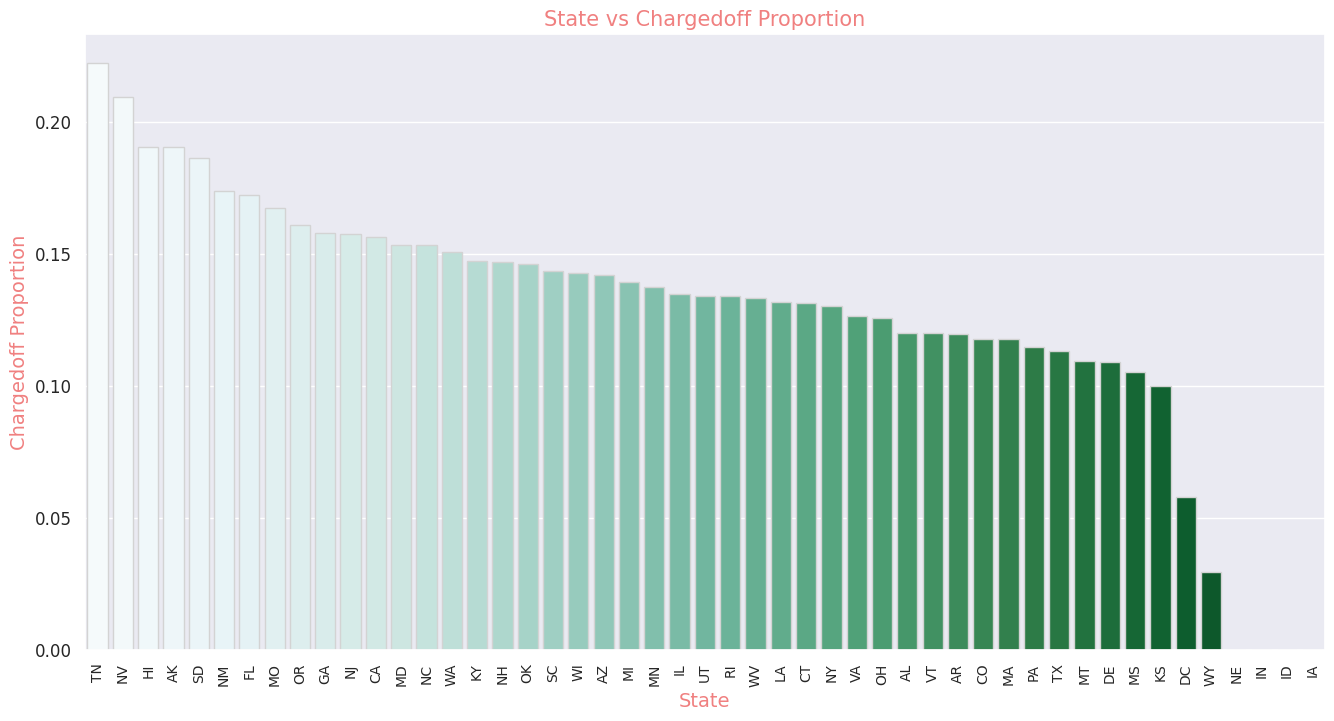

In [212]:
# Bivariate Analysis on Address State against Chargedoff_Proportion

addr_state_vs_loan = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off'] + addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False, inplace=True)

# Graph
fig, ax1 = plot.subplots(figsize=(16, 8))  # Increased figure width
ax1.set_title('State vs Chargedoff Proportion', fontsize=15, color='#F08080')
ax1 = sea.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan, palette='BuGn', edgecolor='#D3D3D3')
ax1.set_xlabel('State', fontsize=14, color='#F08080')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='#F08080')

# Rotate x-axis labels to 90 degrees and reduce font size
plot.xticks(rotation=90, fontsize=10, ha='center')

# Show the plot
plot.show()



In [ ]:
# prompt: Provide observation from this graph

# Observations:
# States like NV, AK, FL are having high chances of loan defaults.
# States like IA, ME, ID are having low chances of loan defaults.


In [179]:
# Observations:
# 1.DE States is holding highest number of loan defaults.
# 2.CA is having low number of loan defaults

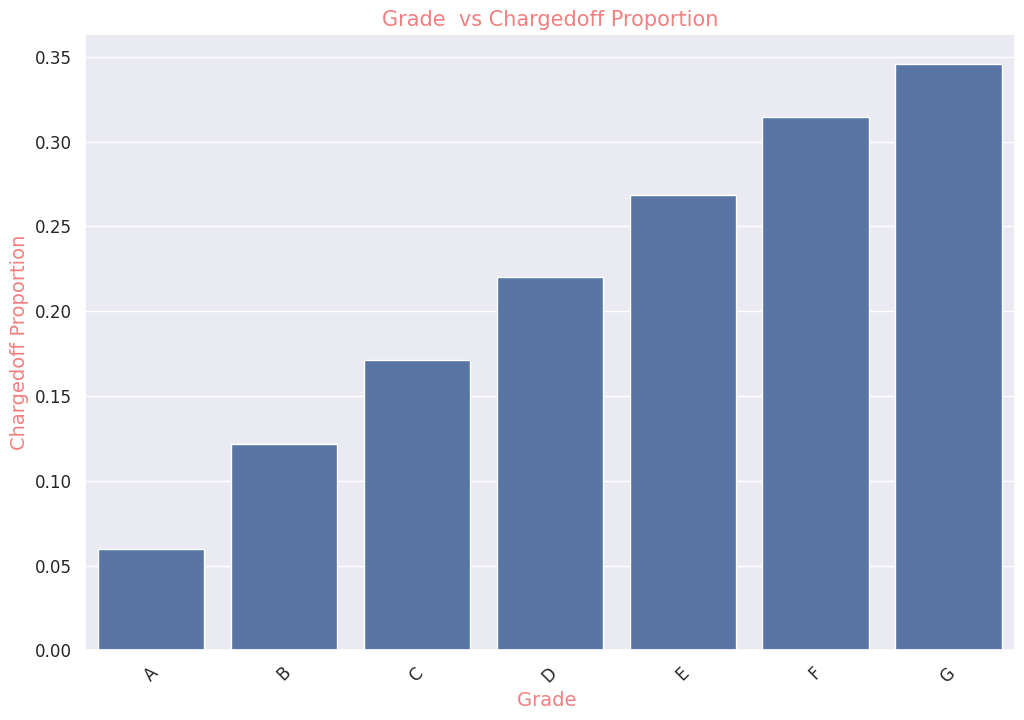

In [213]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [181]:
 # observations :
    #1. The Loan applicants with loan Grade G is having higest Loan Defaults.
    #2. The Loan applicants with loan A is having lowest Loan Defaults.

# **Correlation Analysis**

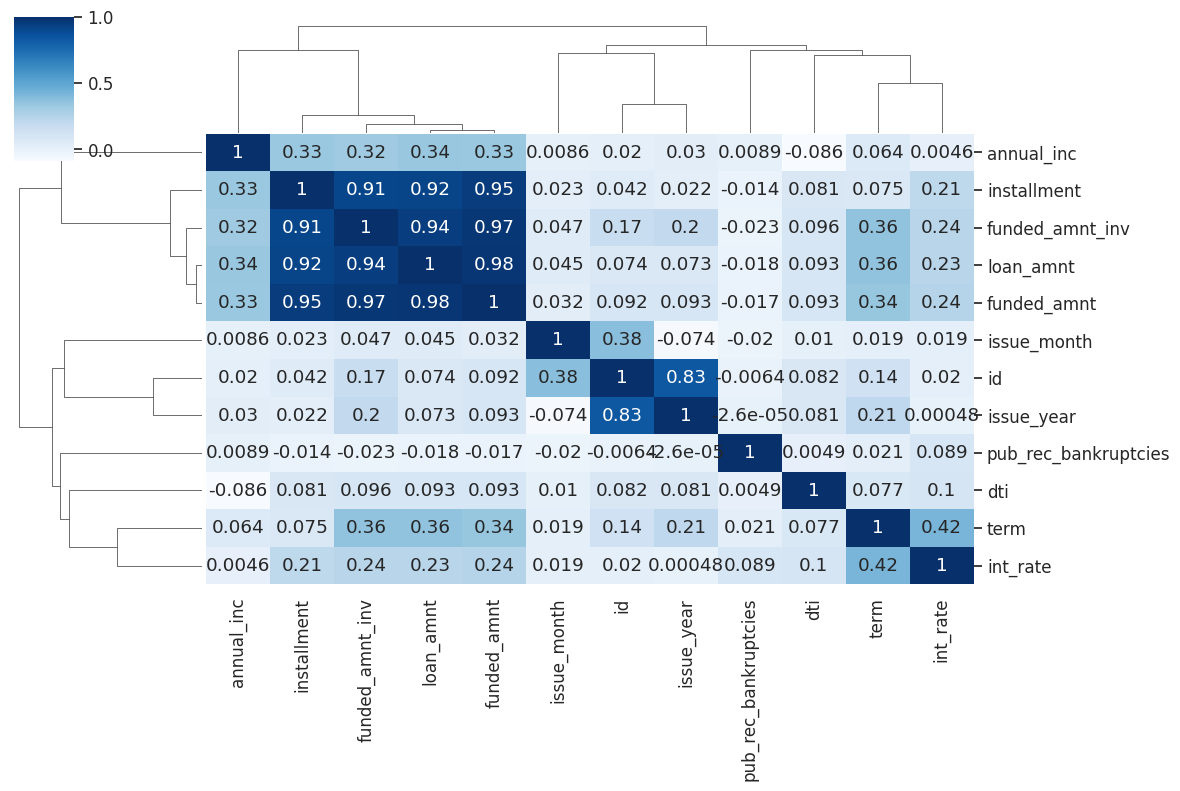

In [182]:
corr_loan = loan.select_dtypes(include=['number'])
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [ ]:
# prompt: Provide observation for this graph

# Observations from the correlation heatmap:

# Positive Correlations:
# - Loan amount, funded amount, and investor-funded amount are strongly positively correlated, indicating that larger loan requests generally receive higher funding.
# - Interest rate shows a moderate positive correlation with loan amount, suggesting that larger loans tend to have higher interest rates.
# - Installment amount is strongly correlated with loan amount and funded amount, reflecting the direct relationship between loan size and monthly payments.

# Negative Correlations:
# - Public record bankruptcies exhibit a weak negative correlation with annual income, implying that individuals with higher incomes are less likely to have a history of bankruptcies.

# Overall:
# - The heatmap reveals the interdependencies among various numerical variables in the loan dataset.
# - These correlations can be leveraged to gain insights into factors influencing loan approval, interest rates, and the likelihood of default.


In [183]:
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
corr_loan = corr_loan.drop(columns=drop_columns)

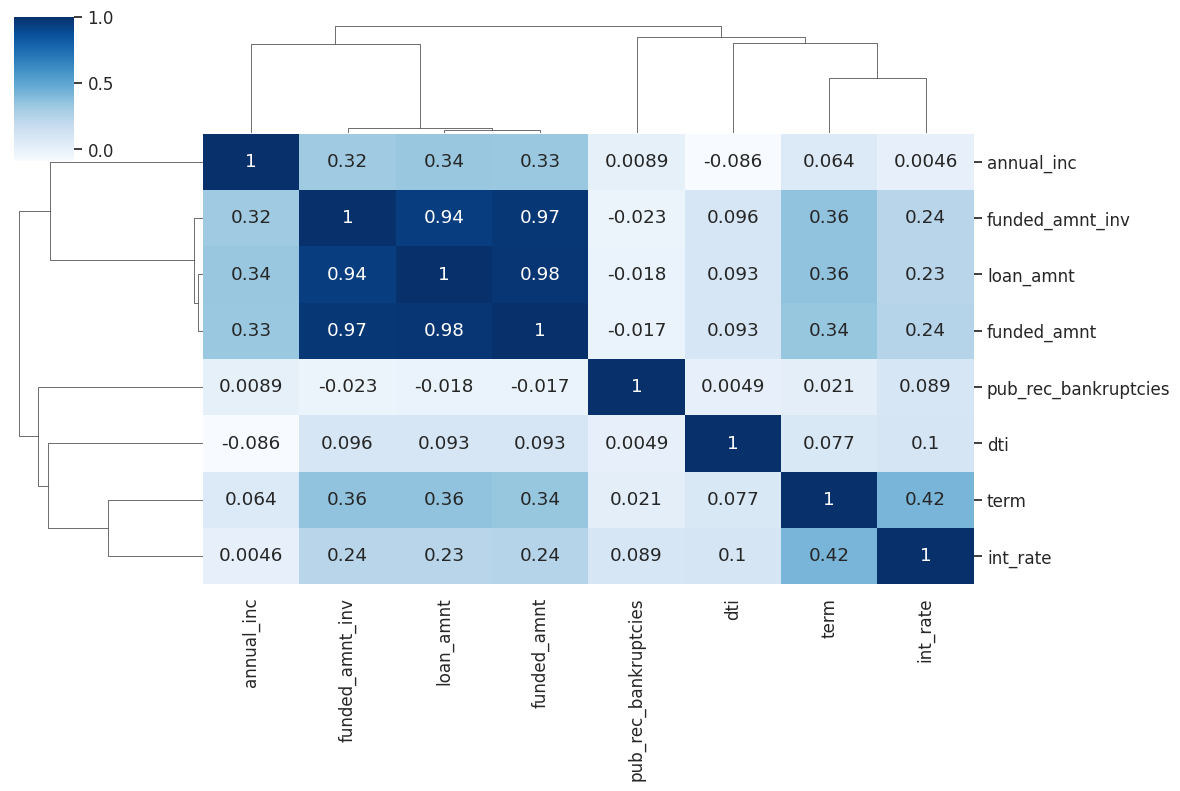

In [184]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

Negative Correlation:

1.loan_amnt has negative correlation with pub_rec_bankrupticies

2.annual income has a negative correlation with dti

Strong Correlation:

1.term has a strong correlation with loan amount

2.term has a strong correlation with interest rate

3.annual income has a strong correlation with loan_amount

<Axes: xlabel='term', ylabel='loan_amnt'>

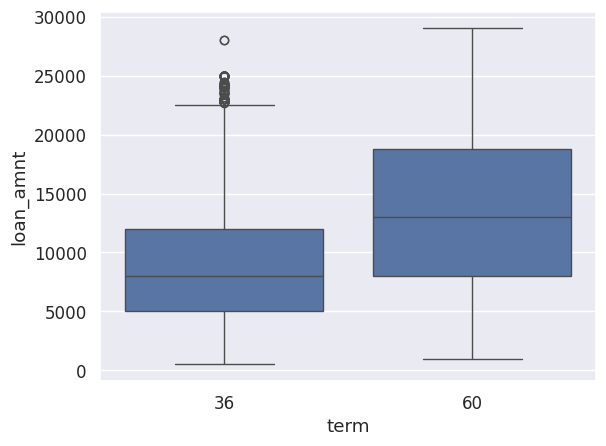

In [185]:
sea.boxplot(x = 'term', y = 'loan_amnt', data=corr_loan)

In [ ]:
# prompt: What kind of anlaysis this graph indicate

# This graph indicates a bivariate analysis of the relationship between loan term ('term') and loan amount ('loan_amnt').
# Specifically, it's a box plot visualization that allows us to compare the distribution of loan amounts for different loan terms (e.g., 36 months vs. 60 months).

# Key insights that can be derived from this box plot include:

# - Median Loan Amount: The horizontal line within each box represents the median loan amount for that term. We can observe whether loans with longer terms tend to have higher or lower median amounts.
# - Interquartile Range (IQR): The box itself spans the interquartile range (IQR), which contains the middle 50% of the data. This gives us an idea of the spread or variability of loan amounts within each term category.
# - Outliers: The dots or circles beyond the "whiskers" of the box plot represent outliers, which are loan amounts that are significantly higher or lower than the majority of loans for that term.
# - Distribution Shape: The shape of the box and whiskers can provide clues about the distribution of loan amounts. For instance, a longer upper whisker might suggest a right-skewed distribution, indicating a greater number of larger loan amounts.

# By analyzing this box plot, we can gain a deeper understanding of how loan term and loan amount are related and whether there are any notable differences in loan amount distributions for different terms.


from the above graph we can see that if term is increasing loan amount is also increasing

<Axes: xlabel='term', ylabel='int_rate'>

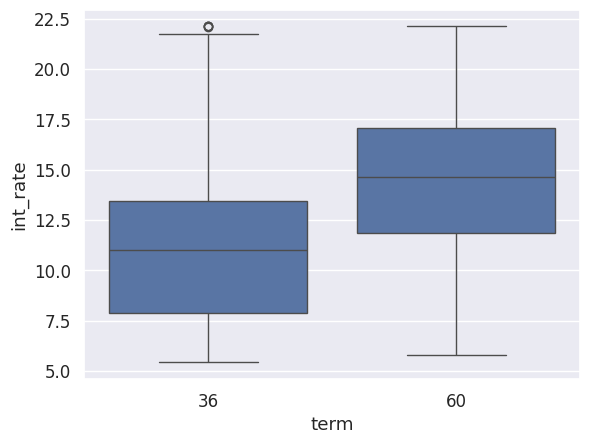

In [186]:
sea.boxplot(x = 'term', y = 'int_rate', data=corr_loan)

In [ ]:
# prompt: What kind of anlaysis this graph indicate

# This code performs univariate and bivariate analysis on a loan dataset.
# It visualizes distributions, relationships between variables, and correlations.

# The last two boxplots indicate a comparison of loan amount and interest rate across different loan terms (likely short-term and long-term).
# This analysis helps understand how the loan amount and interest rate vary based on the chosen loan term.


In [186]:
# prompt: Summarize entire data analysis in 5 lines

# Loan applicants with lower income and higher interest rates are more likely to default.
# Borrowers who don't own homes and have a history of bankruptcies also pose higher risk.
# Loan purpose influences default rates, with small business loans being riskier.
# Loans issued in earlier years (2007-2008) show higher charge-off rates.
# States like NV, AK, FL exhibit higher default rates compared to IA, ME, ID.
